# Analysing 911 data from Kaggle

In [1]:
#loading the library
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data 
df = pd.read_csv('911.csv')

In [5]:
#top 5 zipcode
df['zip'].value_counts().head(5)
#unique title codes 
df['title'].nunique()

110

In [6]:
#creating new features
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [8]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

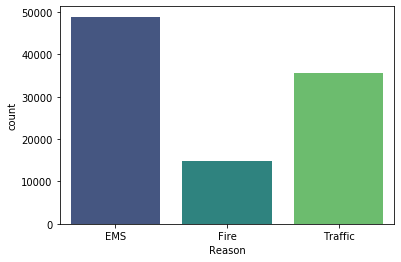

In [9]:
#count calls by reason and visualize
#convert time of call to datetime formatsns.countplot(x='Reason',data=df,palette='viridis')

In [11]:
#convert time of call to datetime formart
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [13]:
#mapping day of week 
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

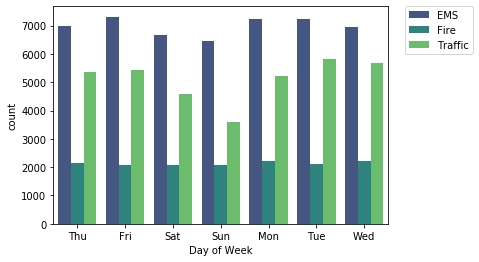

In [14]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

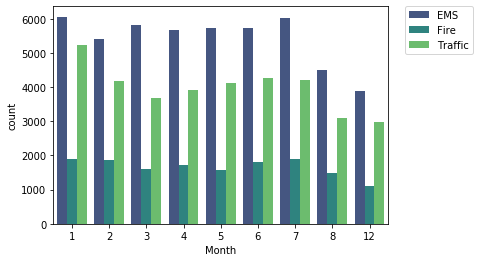

In [15]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
Monthly = df.groupby('Month').count()
Monthly.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


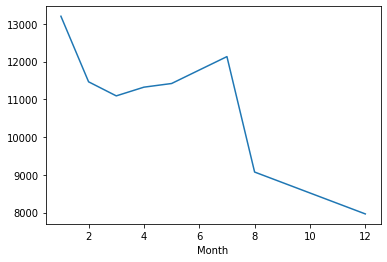

In [17]:
#count of calls by month
# Could be any column
Monthly['twp'].plot()

In [19]:
#newcolumn for the date from the timeStamp column
df['Date']=df['timeStamp'].apply(lambda t: t.date())

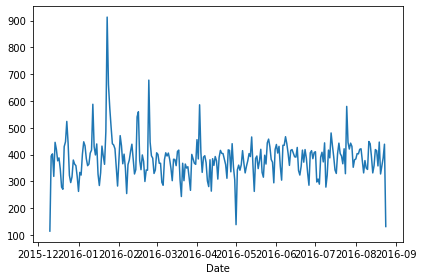

In [20]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

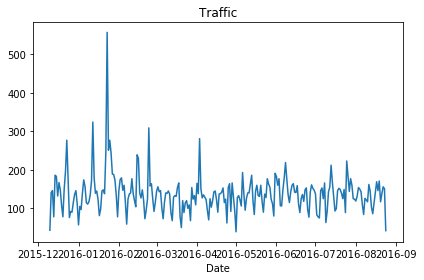

In [22]:
#represents plot representing a Reason='Traffic' for the 911 cal
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

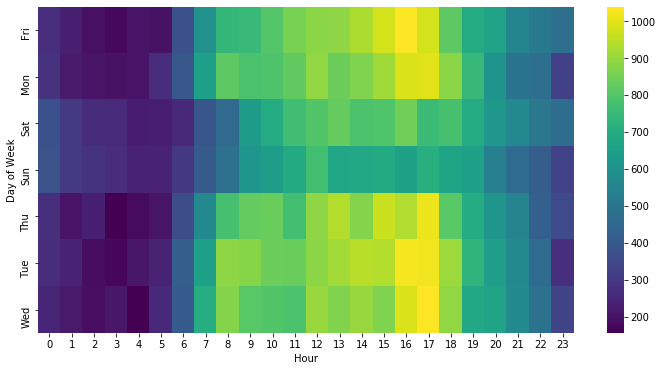

In [23]:


dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')


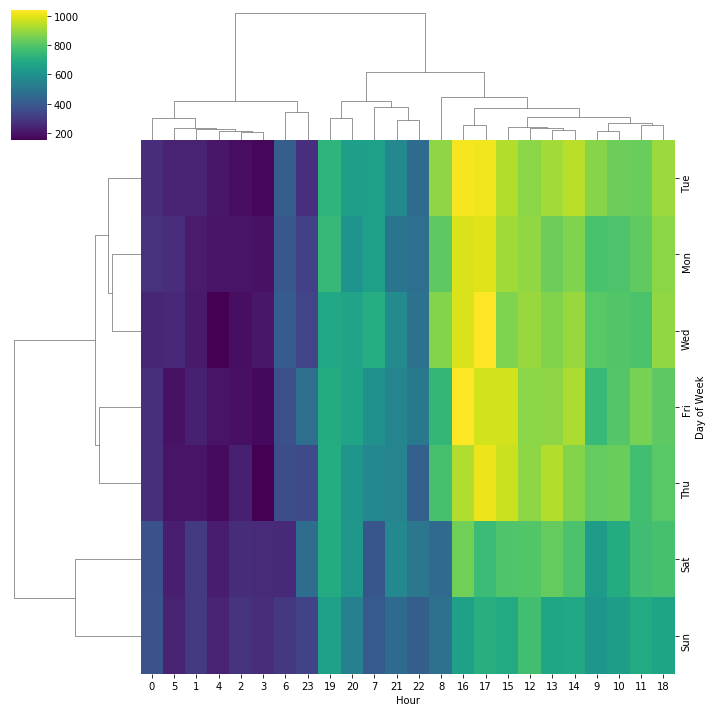

In [24]:
#cluster with hour as column
sns.clustermap(dayHour,cmap='viridis')

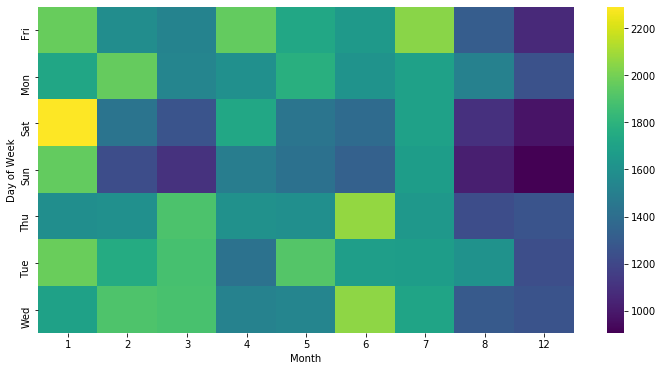

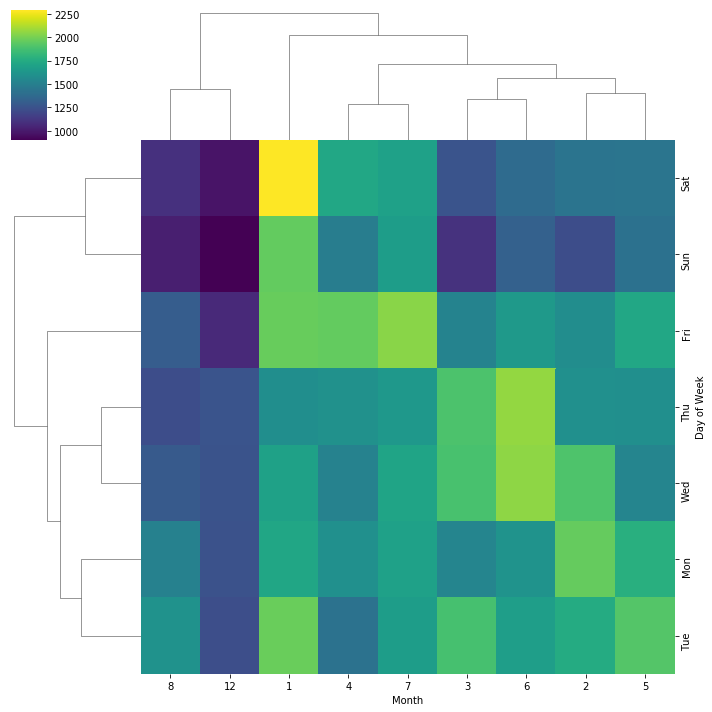

In [27]:
#cluster with hour as column


dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')
sns.clustermap(dayMonth,cmap='viridis')